In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet

In [2]:
def check_if_any_Nan(df):
    if df.isnull().values.any():
        print("there are NaN values")
    else:
        print("no NaN values")


X_train = pd.read_csv('X_train_sml.csv')
display(X_train)
display(X_train.info())
display(X_train.describe())
print(check_if_any_Nan(X_train))

,A2M-AS1,AAAS,AAGAB,AAMDC,AAMP,AASDHPPT,AATF,ABALON,ABCA5,ABCA7,...,ZSWIM3,ZSWIM6,ZSWIM8,ZUP1,ZWILCH,ZWINT,ZXDB,ZXDC,ZYX,ZZEF1
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.935141,0.0,0.000000,0.000000
1,0.0,0.569091,0.0,0.929530,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.906508
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.663242,0.000000
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.874004,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.536011,0.000000
4298,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4299,0.0,0.000000,0.0,0.000000,0.687047,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4300,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4302 entries, 0 to 4301
Columns: 6938 entries, A2M-AS1 to ZZEF1
dtypes: float64(6938)
memory usage: 227.7 MB


None

,A2M-AS1,AAAS,AAGAB,AAMDC,AAMP,AASDHPPT,AATF,ABALON,ABCA5,ABCA7,...,ZSWIM3,ZSWIM6,ZSWIM8,ZUP1,ZWILCH,ZWINT,ZXDB,ZXDC,ZYX,ZZEF1
count,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,...,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000
mean,0.064082,0.056784,0.054638,0.054293,0.118606,0.116550,0.154422,0.030219,0.035808,0.078012,...,0.009451,0.067230,0.070112,0.039127,0.021458,0.036224,0.015337,0.053716,0.204778,0.101017
std,0.252300,0.266363,0.212489,0.219373,0.309176,0.287824,0.325594,0.299741,0.170675,0.246757,...,0.107646,0.225468,0.244255,0.172347,0.122694,0.215143,0.113802,0.218003,0.398829,0.271869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.905344,3.614813,3.349446,3.446696,3.569836,1.951602,3.377967,3.978754,2.801826,3.659378,...,3.584541,3.310851,3.765927,2.172648,1.606275,3.399013,1.718586,3.538041,3.752957,3.024519


no NaN values
None


In [3]:
X_test = pd.read_csv('X_test_sml.csv')
display(X_test)
display(X_test.info())
display(X_test.describe())
print(check_if_any_Nan(X_test))

,A2M-AS1,AAAS,AAGAB,AAMDC,AAMP,AASDHPPT,AATF,ABALON,ABCA5,ABCA7,...,ZSWIM3,ZSWIM6,ZSWIM8,ZUP1,ZWILCH,ZWINT,ZXDB,ZXDC,ZYX,ZZEF1
0,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.812087,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.812087,0.000000
2,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.495315,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.495315
3,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.731568,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.000,0.0,0.891175,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,0.0,0.0,0.0,0.952139,0.000,0.0,0.585352,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
757,0.0,0.0,0.0,0.000000,0.566,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
758,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
759,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Columns: 6938 entries, A2M-AS1 to ZZEF1
dtypes: float64(6938)
memory usage: 40.3 MB


None

,A2M-AS1,AAAS,AAGAB,AAMDC,AAMP,AASDHPPT,AATF,ABALON,ABCA5,ABCA7,...,ZSWIM3,ZSWIM6,ZSWIM8,ZUP1,ZWILCH,ZWINT,ZXDB,ZXDC,ZYX,ZZEF1
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,...,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,0.077802,0.047250,0.063387,0.056340,0.113795,0.125255,0.154524,0.024612,0.038371,0.066529,...,0.006952,0.054857,0.083217,0.042139,0.023672,0.029976,0.010563,0.050047,0.168745,0.097078
std,0.276815,0.216376,0.228721,0.207310,0.361885,0.309628,0.313385,0.250298,0.176190,0.242711,...,0.075395,0.191650,0.251768,0.205652,0.129926,0.164789,0.086085,0.189096,0.360633,0.250867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.978006,2.995203,3.252008,1.447871,3.570888,2.875560,1.978006,3.601838,1.273550,3.128395,...,1.012954,1.362891,2.910823,3.308814,1.128038,1.586557,0.985131,1.313289,3.384892,1.773425


no NaN values
None


In [4]:
Y_train = pd.read_csv('Y_train.csv')
display(Y_train)
display(Y_train.info())
display(Y_train.describe())
print(check_if_any_Nan(Y_train))

,CD36
0,0.257559
1,2.906230
2,0.196396
3,0.143823
4,1.132499
...,...
4297,0.290534
4298,0.000000
4299,0.096170
4300,3.213369


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4302 entries, 0 to 4301
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CD36    4302 non-null   float64
dtypes: float64(1)
memory usage: 33.7 KB


None

,CD36
count,4302.000000
mean,1.083916
std,1.460003
min,0.000000
25%,0.080222
50%,0.235725
75%,2.627521
max,5.104848


no NaN values
None


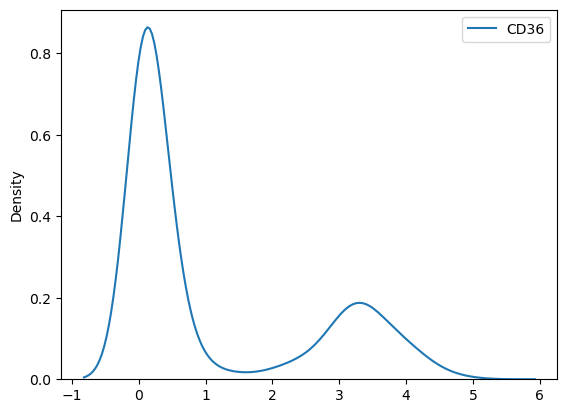

In [41]:
sns.kdeplot(Y_train)
plt.savefig('Y_train_distribution.png')

In [7]:
corr = X_train.corrwith(Y_train["CD36"])
corr

A2M-AS1   -0.119095
AAAS       0.083632
AAGAB     -0.007509
AAMDC      0.036832
AAMP       0.025296
             ...   
ZWINT      0.196732
ZXDB      -0.061081
ZXDC       0.024780
ZYX        0.158170
ZZEF1     -0.000583
Length: 6938, dtype: float64

In [8]:
top_100_corr = corr.sort_values()[-100:]
top_100_corr

S100A8      0.509530
GSPT1       0.512387
UROD        0.512720
ARL4A       0.513706
PDZK1IP1    0.514405
              ...   
LGALS3      0.684010
SLC25A37    0.685778
AHSP        0.687820
TALDO1      0.698442
BLVRB       0.740695
Length: 100, dtype: float64

In [50]:
top_10_corr = corr.sort_values()[-10:]
top_10_corr_train = X_train[top_10_corr.index.values].join(Y_train)
top_10_corr_train

,HBM,NCOA4,HBA1,SLC4A1,HBD,LGALS3,SLC25A37,AHSP,TALDO1,BLVRB,CD36
0,0.000000,0.000000,0.935141,0.000000,0.000000,0.000000,0.000000,0.935141,0.000000,0.935141,0.257559
1,0.000000,0.000000,0.569091,0.000000,0.000000,0.000000,0.000000,0.569091,0.569091,0.000000,2.906230
2,0.000000,0.000000,0.906508,0.000000,0.000000,0.906508,0.000000,0.906508,0.000000,0.000000,0.196396
3,0.000000,0.000000,1.341095,0.000000,0.000000,0.663242,0.663242,0.000000,0.663242,0.000000,0.143823
4,0.000000,0.000000,1.646630,0.000000,0.000000,0.874004,0.000000,0.000000,0.000000,0.000000,1.132499
...,...,...,...,...,...,...,...,...,...,...,...
4297,0.000000,0.000000,0.883086,0.000000,0.536011,0.536011,0.000000,0.000000,0.536011,0.000000,0.290534
4298,0.000000,0.000000,0.889081,0.000000,0.000000,0.000000,0.000000,0.000000,0.889081,0.000000,0.000000
4299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096170
4300,4.517663,4.802613,10.018817,5.491647,7.434019,5.491647,6.182732,6.667445,5.024113,6.500622,3.213369


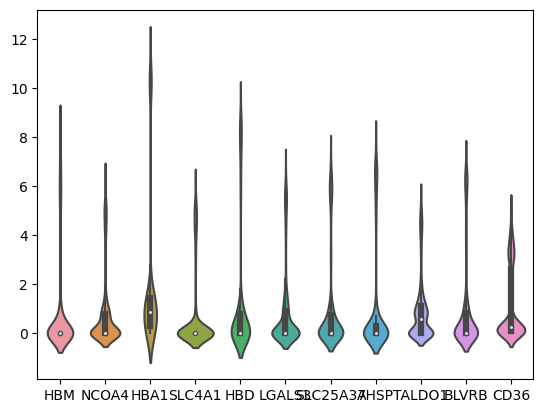

In [51]:
sns.violinplot(data=top_10_corr_train)
plt.savefig('corr_violinplot.png')

In [9]:
multi_corr = X_train[top_100_corr.index.values].corr()
multi_corr

,S100A8,GSPT1,UROD,ARL4A,PDZK1IP1,TESC,SERF2,TENT5C,UBE2B,SNX3,...,HBM,NCOA4,HBA1,SLC4A1,HBD,LGALS3,SLC25A37,AHSP,TALDO1,BLVRB
S100A8,1.000000,-0.045156,-0.046983,-0.027837,-0.032589,0.035076,0.023531,-0.068666,-0.044207,0.026455,...,-0.067506,0.078498,-0.056986,-0.055383,-0.068294,0.070296,-0.017145,-0.064677,0.165622,0.045403
GSPT1,-0.045156,1.000000,0.533387,0.744034,0.702892,0.605389,0.704617,0.789012,0.770055,0.638459,...,0.756989,0.829031,0.828954,0.805304,0.820854,0.823441,0.833371,0.816562,0.765672,0.823419
UROD,-0.046983,0.533387,1.000000,0.552959,0.548736,0.533930,0.485517,0.545867,0.539286,0.491348,...,0.676379,0.583499,0.668947,0.666887,0.691267,0.613477,0.658166,0.696171,0.584366,0.673984
ARL4A,-0.027837,0.744034,0.552959,1.000000,0.733055,0.605083,0.632428,0.759153,0.755997,0.624811,...,0.718980,0.797988,0.796309,0.802926,0.800630,0.786568,0.811726,0.789776,0.746012,0.799327
PDZK1IP1,-0.032589,0.702892,0.548736,0.733055,1.000000,0.642224,0.633748,0.714246,0.702852,0.604627,...,0.741279,0.766387,0.788957,0.781170,0.790843,0.756147,0.793161,0.789802,0.702213,0.786191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LGALS3,0.070296,0.823441,0.613477,0.786568,0.756147,0.675313,0.770261,0.814920,0.811717,0.694602,...,0.832157,0.894020,0.898533,0.883180,0.897849,1.000000,0.907039,0.895076,0.848829,0.919111
SLC25A37,-0.017145,0.833371,0.658166,0.811726,0.793161,0.706013,0.742900,0.853180,0.830908,0.721555,...,0.910670,0.907747,0.963422,0.957262,0.964221,0.907039,1.000000,0.963202,0.842960,0.954650
AHSP,-0.064677,0.816562,0.696171,0.789776,0.789802,0.710232,0.730309,0.836276,0.813215,0.710315,...,0.934567,0.885664,0.973502,0.959761,0.980022,0.895076,0.963202,1.000000,0.833205,0.963952
TALDO1,0.165622,0.765672,0.584366,0.746012,0.702213,0.653296,0.719503,0.750019,0.751810,0.647800,...,0.778325,0.851093,0.830216,0.813668,0.830379,0.848829,0.842960,0.833205,1.000000,0.865536


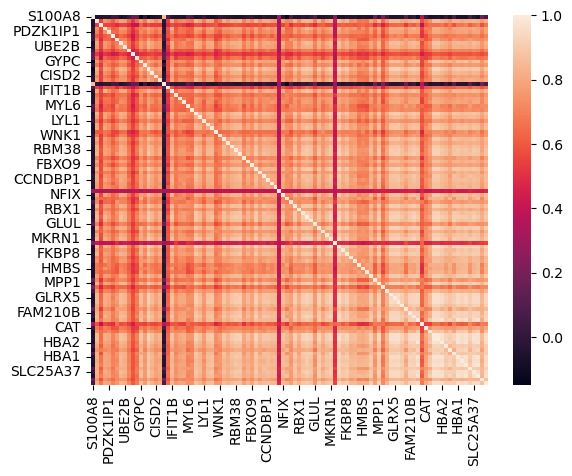

In [47]:
sns.heatmap(multi_corr)
plt.savefig('corr_heatmap.png')

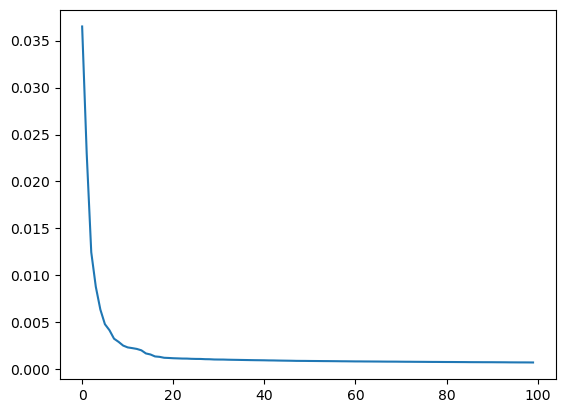

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train_scaled = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.plot(range(pca.n_components), pca.explained_variance_ratio_)
plt.savefig('pca.png')

In [60]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.5, 1, 2], 'l1_ratio':[0, 0.5, 1]}

elasticNet = ElasticNet()
regr = GridSearchCV(elasticNet, parameters, cv=5, scoring='neg_root_mean_squared_error')
regr.fit(X_train_pca, Y_train.values.ravel())
print(regr.best_score_)
print(regr.best_params_)

/home/jan/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.863e+02, tolerance: 7.167e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/jan/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+02, tolerance: 7.391e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn

-0.41378538867190573
{'alpha': 2, 'l1_ratio': 0}


/home/jan/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.151e+02, tolerance: 9.168e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [64]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators':[10, 20], 'max_depth':[5, 10], 'criterion':['squared_error', 'friedman_mse', 'poisson']}

regr = GridSearchCV(RandomForestRegressor(), parameters, cv=5, scoring='neg_root_mean_squared_error')
regr.fit(X_train_pca, Y_train.values.ravel())
print(regr.best_score_)
print(regr.best_params_)

-0.35398594232973635
{'criterion': 'squared_error', 'max_depth': 10, 'n_estimators': 20}


In [65]:
from sklearn.dummy import DummyRegressor

parameters = {'strategy':['mean']}

regr = GridSearchCV(DummyRegressor(), parameters, cv=5, scoring='neg_root_mean_squared_error')
regr.fit(X_train_pca, Y_train.values.ravel())
print(regr.best_score_)
print(regr.best_params_)

-1.4599745884698907
{'strategy': 'mean'}


In [39]:
parameters = {'n_estimators':[200], 'max_depth':[10]}

regr = GridSearchCV(RandomForestRegressor(), parameters, cv=5, scoring='neg_root_mean_squared_error')
regr.fit(X_train_pca, Y_train.values.ravel())
print(regr.best_score_)
print(regr.best_params_)

-0.3479099601102155
{'max_depth': 10, 'n_estimators': 200}


In [67]:
parameters = {'n_estimators':[180, 200, 300], 'max_depth':[8, 10, 12]}

regr = GridSearchCV(RandomForestRegressor(), parameters, cv=5, scoring='neg_root_mean_squared_error')
regr.fit(X_train_pca, Y_train.values.ravel())
print(regr.best_score_)
print(regr.best_params_)

-0.34775154065506514
{'max_depth': 12, 'n_estimators': 180}


In [68]:
parameters = {'n_estimators':[180], 'max_depth':[12, 14, 16]}

regr = GridSearchCV(RandomForestRegressor(), parameters, cv=5, scoring='neg_root_mean_squared_error')
regr.fit(X_train_pca, Y_train.values.ravel())
print(regr.best_score_)
print(regr.best_params_)

-0.34717389391459985
{'max_depth': 14, 'n_estimators': 180}


In [70]:
X_test_pca = pca.fit_transform(StandardScaler().fit_transform(X_test))

regr = RandomForestRegressor(n_estimators=180, max_depth=14)
regr.fit(X_train_pca, Y_train.values.ravel())
Y_pred = regr.predict(X_test_pca)

In [74]:
df = pd.DataFrame(Y_pred, columns = ['pred'])
df.index.name = 'Id'
df

,pred
Id,
0,0.186051
1,0.561424
2,0.137232
3,0.197821
4,0.318299
...,...
756,0.182981
757,0.166513
758,3.425794


In [76]:
df.to_csv('jd406140._prediction.csv')